# 1.1 - Movielens full - EDA
Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.
- a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan.

In [12]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
movies='../../data/ml-latest/movies.csv'
ratings='../../data/ml-latest/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId', 'title', 'genres'], dtype={'movieId':'int32','title':'str' })
df_ratings=pd.read_csv(ratings, usecols=['userId', 'movieId', 'rating'], dtype={'userID':'int32', 'movieId':'int32', 'rating':'float32'})

In [3]:
print(df_ratings.shape)

(33832162, 3)


In [4]:
df_ratings.head(20)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


- b) Vilka är de 10 filmerna med flest ratings?

In [5]:
rating_counts = df_ratings["movieId"].value_counts()

movies = rating_counts.head(10)

top_10_titles = df_movies[df_movies["movieId"].isin(movies.index)].copy()

top_10_titles['Number of ratings'] = top_10_titles['movieId'].map(rating_counts)

top_10_titles_sorted = top_10_titles.sort_values(by='Number of ratings', ascending=False)

top_10_titles_sorted = top_10_titles_sorted.rename(columns={'title': 'Title'})

print(top_10_titles_sorted[['Title', 'Number of ratings']].to_string(index=False))

                                                Title  Number of ratings
                     Shawshank Redemption, The (1994)             122296
                                  Forrest Gump (1994)             113581
                                  Pulp Fiction (1994)             108756
                                   Matrix, The (1999)             107056
                     Silence of the Lambs, The (1991)             101802
            Star Wars: Episode IV - A New Hope (1977)              97202
                                    Fight Club (1999)              86207
                              Schindler's List (1993)              84232
                                 Jurassic Park (1993)              83026
Star Wars: Episode V - The Empire Strikes Back (1980)              80200


c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [34]:
average_ratings = df_ratings.groupby('movieId')['rating'].mean()

top_10_titles_sorted['Average rating'] = top_10_titles_sorted['movieId'].map(average_ratings)

print(top_10_titles_sorted[['Title', 'Number of ratings', 'Average rating']].to_string(index=False))

                                                Title  Number of ratings  Average rating
                     Shawshank Redemption, The (1994)             122296        4.416792
                                  Forrest Gump (1994)             113581        4.068189
                                  Pulp Fiction (1994)             108756        4.191778
                                   Matrix, The (1999)             107056        4.160631
                     Silence of the Lambs, The (1991)             101802        4.150287
            Star Wars: Episode IV - A New Hope (1977)              97202        4.092401
                                    Fight Club (1999)              86207        4.236019
                              Schindler's List (1993)              84232        4.242337
                                 Jurassic Park (1993)              83026        3.689013
Star Wars: Episode V - The Empire Strikes Back (1980)              80200        4.118030


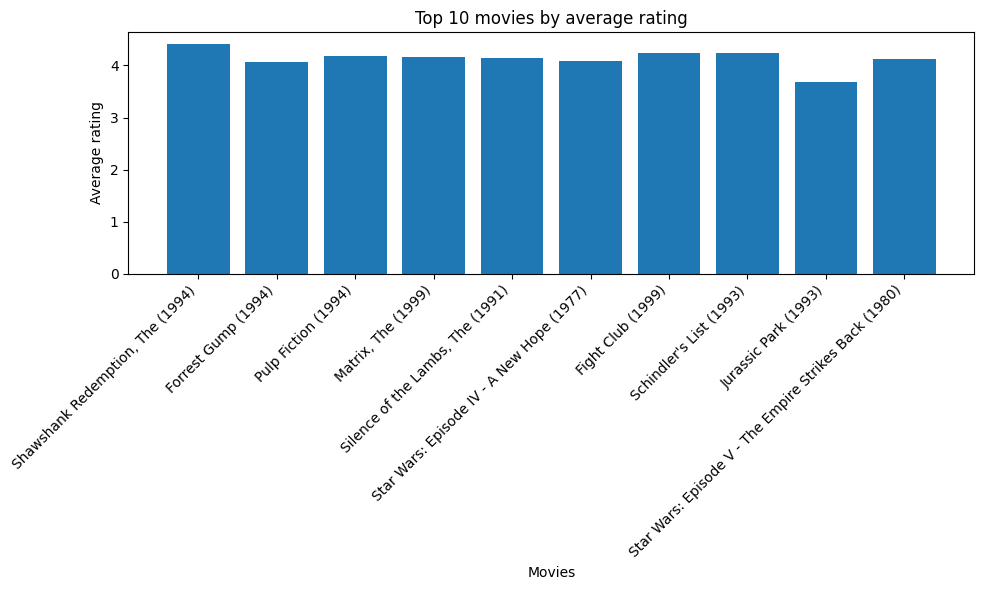

In [48]:
# Bar chart for top 10 movies by average rating
titles = top_10_titles_sorted['Title']
num_ratings = top_10_titles_sorted['Number of ratings']
avg_ratings = top_10_titles_sorted['Average rating']

plt.figure(figsize=(10, 6))
plt.bar(titles, avg_ratings)
plt.title('Top 10 movies by average rating')
plt.xlabel('Movies')
plt.ylabel('Average rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

d) Gör en plot över årtal och antalet filmer representerade i datasetet.

In [32]:
# Extract year from the title column
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)')

# Count the number of movies per year
movies_per_year = df_movies['year'].value_counts().sort_index().reset_index()

# Renaming columns in the new DataFrame
movies_per_year.columns = ['Year', 'Number of movies']

fig = px.line(movies_per_year, x='Year', y='Number of movies', 
             labels={'Number of Movies': 'Number of Movies', 'Release Year': 'Release Year'},
             title='Number of movies by year')
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

 e) Gör en plot över antalet ratings mot movieId.

Top 5 inom drama